In [ ]:
# Info:

# Author:
# Date

# Purpose:

# inputs:

# outputs:

# Version control:

#------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import copy

In [25]:
# Import as pandas dataframes
data = pd.read_csv('Cancer_data.csv')

In [26]:
# Get the x and y data
x = data.iloc[:, 3:]
y = pd.DataFrame(data['radius_mean'])

In [ ]:
'''
# fix the nan -------------------------
# method 1: delete the rows
dum = ~np.isnan (data_analysis)
new_data = data_analysis[dum]

# Or get indeses
inds = np.where(np.isfinite(data_analysis[:,0]))
new_data = data_analysis[inds]

# method 2: replace nan with mean
inds2 = np.where(np.isnan(data_analysis[:,0]))

#new_data = data_analysis
new_data = np.copy(data_analysis)

mean_of_col = np.nanmean(new_data, axis=0)

new_data[inds2] = mean_of_col
'''

In [5]:
#-- One hot encoder
from sklearn.preprocessing import LabelEncoder
# encode the target
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)

/Users/daniyarkurmanbayev/miniforge3/envs/globalenv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Feature Scaling
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2,\
                                                    random_state = 0)

In [29]:
# size/shape of dataframe
n_samples = x_train.shape[0]
n_featuers = x_train.shape[1]

In [35]:
# Make the NN -----------------------------------------------------------------

# Importing the Keras libraries and packages
from keras.layers import Dense
from keras.models import Sequential

# define and initialize the model
my_classifier = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 15, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = n_featuers))

# Adding the second hidden layer
my_classifier.add(Dense(units = 10, kernel_initializer = 'uniform',
                        activation = 'relu'))

# Adding the last (output) layer
my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'relu'))

# Compiling the ANN
my_classifier.compile(optimizer = 'adam', loss = 'mean_squared_error',
                      metrics = ['mse'])

In [36]:
#-- plot the model
from tensorflow.keras.utils import plot_model
plot_model(my_classifier, to_file='model_reg.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [37]:
# Fitting the ANN to the Training set
history = my_classifier.fit(x_train, y_train, validation_split=0.3,
                            batch_size = 10, epochs = 100)

Epoch 1/100
21/32 [==================>...........] - ETA: 0s - loss: 209.5349 - mse: 209.5348

2022-01-14 18:40:23.303825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 9ms/step - loss: 206.7434 - mse: 206.7434 - val_loss: 218.8206 - val_mse: 218.8206
Epoch 2/100
19/32 [================>.............] - ETA: 0s - loss: 213.2013 - mse: 213.2013

2022-01-14 18:40:23.595776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 8ms/step - loss: 201.7851 - mse: 201.7851 - val_loss: 207.7383 - val_mse: 207.7383
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 181.6896 - mse: 181.6896 - val_loss: 172.3930 - val_mse: 172.3930
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 135.2192 - mse: 135.2192 - val_loss: 109.8651 - val_mse: 109.8651
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 72.7963 - mse: 72.7963 - val_loss: 57.1994 - val_mse: 57.1994
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 37.7722 - mse: 37.7722 - val_loss: 49.0523 - val_mse: 49.0523
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 32.3641 - mse: 32.3641 - val_loss: 47.4614 - val_mse: 47.4614
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 30.2453 - mse: 30.2453 - val_loss: 44.8452 - val_mse: 44.8452
Epoch 9/100
32/32 [==============================] - 0s

In [12]:
# Make predictions
# Predicting the Test set results
y_pred_train = history.predict(x_train)

2022-01-14 18:35:51.082016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [38]:
# Predicting the Test set results
y_pred_test = history.predict(x_test)

AttributeError: 'History' object has no attribute 'predict'

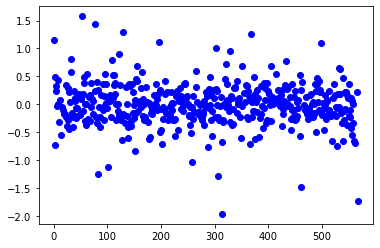

In [14]:
# Evaluation and plots-----------------
#Plot residuals
# calculate residuals
resi = y_train-y_pred_train

plt.subplots() # open a new plot
plt.plot (resi, 'bo')

In [40]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


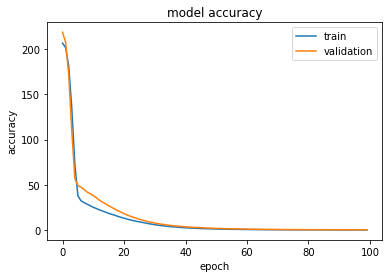

In [43]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

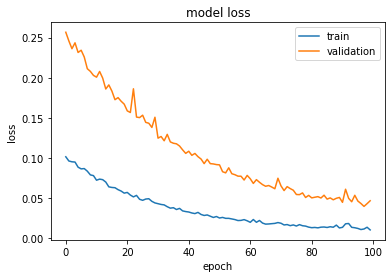

In [24]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()